<a href="https://colab.research.google.com/github/moonsy0311/-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%B9%84%EA%B8%B0%EB%84%88_pandas_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

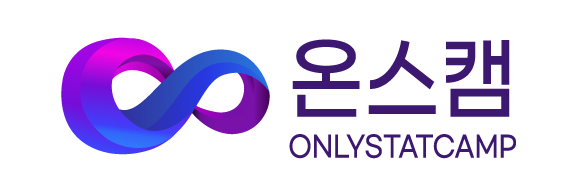

---

In [ ]:
# 한글 폰트 설치
! rm -rf NanumFont*
! wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip
! unzip NanumFont_TTF_ALL.zip -d NanumFont
! rm -rf NanumFont_TTF_ALL.zip

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/content/NanumFont/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

<img src="https://pandas.pydata.org/static/img/pandas.svg" height="100">

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("./salaries.xlsx")

In [ ]:
df

,work_year,experience_level,job_title,company_size,salary_in_usd
0,2023,Expert,Business Intelligence Engineer,L,202800
1,2023,Expert,Business Intelligence Engineer,L,104300
2,2023,Intermediate,Data Manager,M,73824
3,2023,Intermediate,Data Manager,M,67672
4,2023,Expert,Data Scientist,M,290000
...,...,...,...,...,...
7969,2020,Expert,Data Scientist,L,412000
7970,2021,Intermediate,Principal Data Scientist,L,151000
7971,2020,Junior,Data Scientist,S,105000
7972,2020,Junior,Business Data Analyst,L,100000


## scatter plot

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

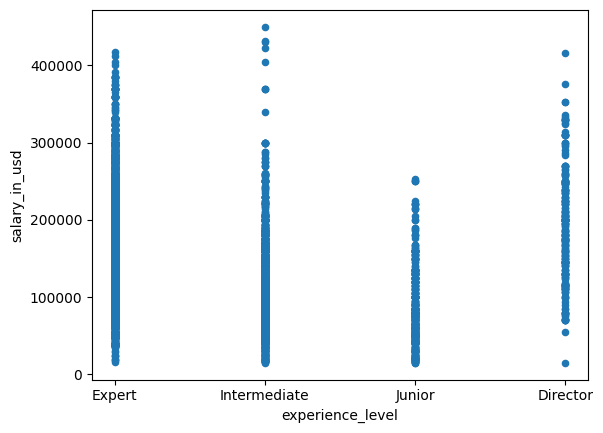

In [ ]:
df.plot.scatter(x="experience_level", y="salary_in_usd")

## box plot

salary_in_usd    Axes(0.125,0.11;0.775x0.77)
dtype: object

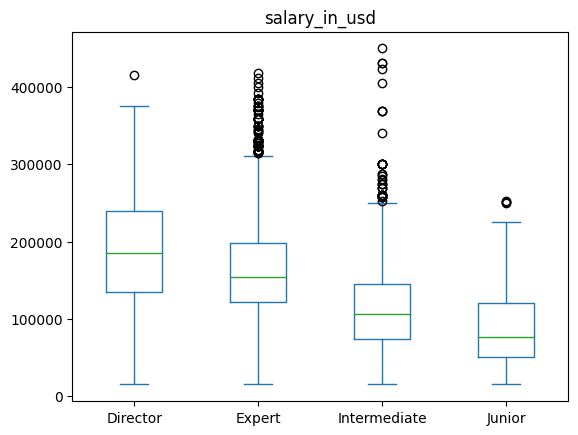

In [ ]:
df.plot.box(by="experience_level", column="salary_in_usd")

## histogram plot

<Axes: >

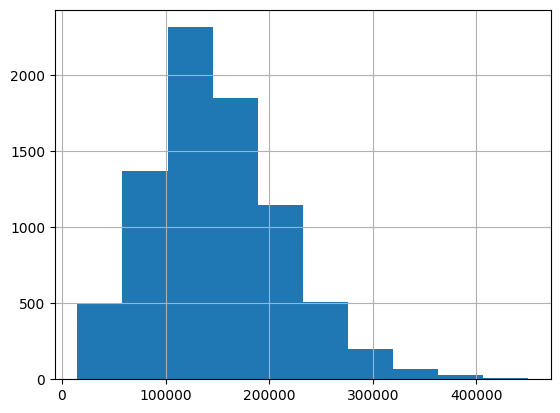

In [ ]:
df.salary_in_usd.hist()

<Axes: >

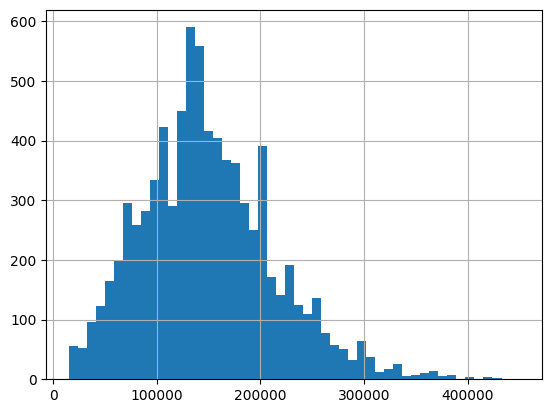

In [ ]:
df.salary_in_usd.hist(bins=50)

## bar plot

In [ ]:
level_mean = df.groupby("experience_level").salary_in_usd.mean()
level_mean

experience_level
Director        189666.587755
Expert          161740.380431
Intermediate    114481.865459
Junior           86152.589744
Name: salary_in_usd, dtype: float64

<Axes: xlabel='experience_level'>

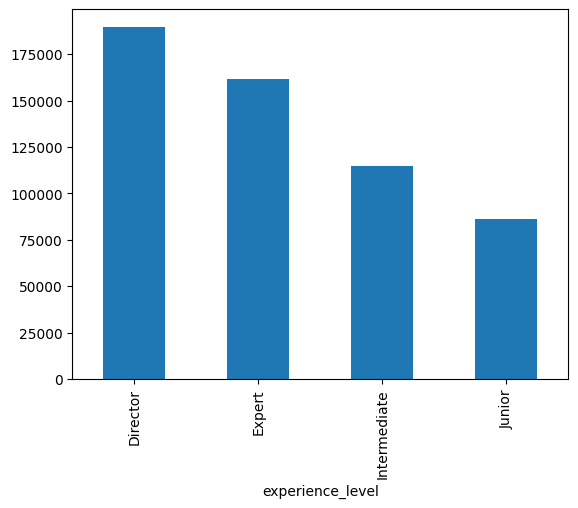

In [ ]:
level_mean.plot.bar()

In [ ]:
pivot = df.pivot_table(
    values="salary_in_usd",
    index="experience_level",
    columns="work_year",
    aggfunc="mean"
)
pivot

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.250000,186128.000000,188260.292683,190360.678947
Expert,138648.894737,125989.746667,148059.962148,165865.267905
Intermediate,91870.935484,86818.390805,102733.432961,121317.005607
Junior,69840.666667,63463.065217,80393.295652,94446.465587


<Axes: ylabel='experience_level'>

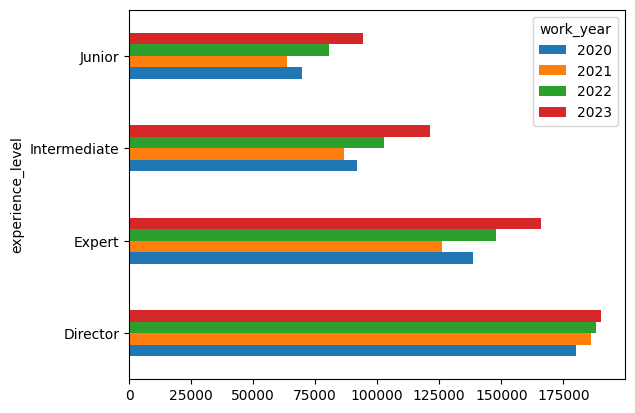

In [ ]:
pivot.plot.barh()

<Axes: ylabel='experience_level'>

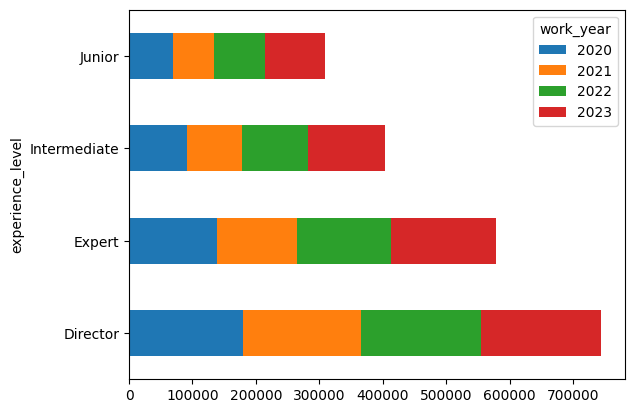

In [ ]:
pivot.plot.barh(stacked=True)

## line plot

In [ ]:
year_mean = df.groupby("work_year").salary_in_usd.mean()
year_mean

work_year
2020    102250.866667
2021     99922.073394
2022    134508.234545
2023    155808.402255
Name: salary_in_usd, dtype: float64

<Axes: xlabel='work_year'>

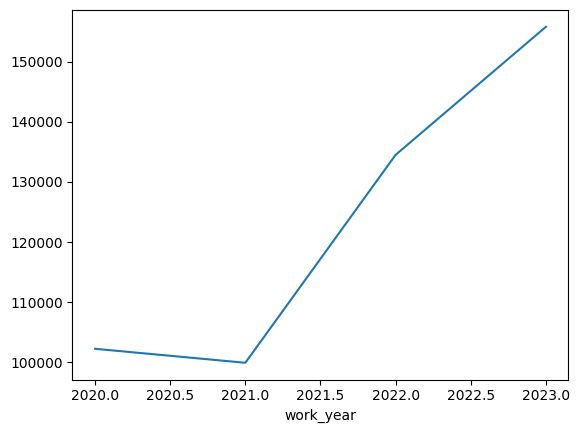

In [ ]:
year_mean.plot.line()

## pie plot

<Axes: ylabel='salary_in_usd'>

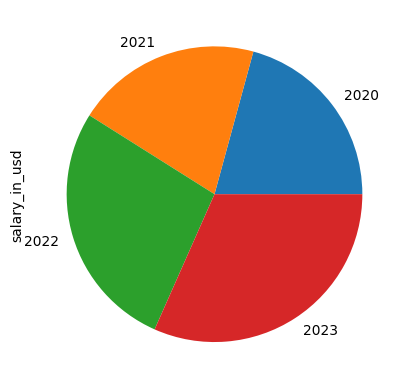

In [ ]:
year_mean.plot.pie()

## style

In [ ]:
pivot = df.pivot_table(
    values="salary_in_usd",
    index="experience_level",
    columns="work_year",
    aggfunc="mean"
)
pivot

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.250000,186128.000000,188260.292683,190360.678947
Expert,138648.894737,125989.746667,148059.962148,165865.267905
Intermediate,91870.935484,86818.390805,102733.432961,121317.005607
Junior,69840.666667,63463.065217,80393.295652,94446.465587


### style.bar

In [ ]:
pivot.style.bar()

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.250000,186128.000000,188260.292683,190360.678947
Expert,138648.894737,125989.746667,148059.962148,165865.267905
Intermediate,91870.935484,86818.390805,102733.432961,121317.005607
Junior,69840.666667,63463.065217,80393.295652,94446.465587


In [ ]:
pivot.style.bar(subset=[2022, 2023], cmap="Blues", vmin=50000, vmax=250000, props="width: 500px;")

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.250000,186128.000000,188260.292683,190360.678947
Expert,138648.894737,125989.746667,148059.962148,165865.267905
Intermediate,91870.935484,86818.390805,102733.432961,121317.005607
Junior,69840.666667,63463.065217,80393.295652,94446.465587


### style.format

In [ ]:
pivot.style.format(formatter="{:.1f}").bar()

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.2,186128.0,188260.3,190360.7
Expert,138648.9,125989.7,148060.0,165865.3
Intermediate,91870.9,86818.4,102733.4,121317.0
Junior,69840.7,63463.1,80393.3,94446.5


### style.background_gradient

In [ ]:
pivot.style.format(formatter="{:.1f}").background_gradient()

work_year,2020,2021,2022,2023
experience_level,,,,
Director,179958.2,186128.0,188260.3,190360.7
Expert,138648.9,125989.7,148060.0,165865.3
Intermediate,91870.9,86818.4,102733.4,121317.0
Junior,69840.7,63463.1,80393.3,94446.5
